In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Titanic-Dataset.csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df["Age"].isnull().sum()

177

In [ ]:
age_array = np.array(df["Age"])
age_array = age_array[~np.isnan(age_array)]

len(age_array)
type(age_array)

numpy.ndarray

In [ ]:
def mean(array):

  sum = 0
  n = len(array)
  for i in array:
    sum += i
    if (i == 0.0):
      n -= 1

  mean = sum / len(array)

  return mean


In [ ]:
def mode(array):
    counts = {}
    for num in array:
        if num in counts:
            counts[num] += 1
        else:
            counts[num] = 1

    max_count = 0
    mode_val = None
    for num, count in counts.items():
        if count > max_count:
            max_count = count
            mode_val = num
    return mode_val


In [ ]:

def median(array):

  array = np.sort(array)
  n = len(array)
  if n % 2 == 0 :
    return (array[n//2 -1] + array[n//2]) / 2

  else:
    return array[n//2]

In [ ]:
def standard_deviation(array):
    n = len(array)
    if n == 0:
        return 0

    m = mean(array)
    variance = sum([(x - m) ** 2 for x in array]) / n
    return variance**0.5

In [ ]:
def quartile_calculation(array):

  n = len(array)
  max_elem = max(array)
  min_elem = min(array)
  np.sort(array)

  Q1 = np.percentile(array, 25)
  Q2 = np.percentile(array, 50)
  Q3 = np.percentile(array, 75)

  IQR = Q3 - Q1

  return Q1, Q2, Q3, IQR


In [ ]:
print(f"Mean: {mean(age_array)}")
print(f"Mode: {mode(age_array)}")
print(f"Median: {median(age_array)}")
print(f"Std: {standard_deviation(age_array)}")

q1,q2,q3, IQR = quartile_calculation(age_array)
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"IQR: {IQR}")

Mean: 29.69911764705882
Mode: 24.0
Median: 28.0
Std: 14.516321150817317
Q1: 20.125
Q2: 28.0
Q3: 38.0
IQR: 17.875


In [ ]:
def outlier_points(array):

  q1,q2,q3, IQR = quartile_calculation(array)

  lower_bound = q1 - 1.5 * IQR
  upper_bound = q3 + 1.5 * IQR

  outlier_points = []
  for i in array:
    if i < lower_bound or i > upper_bound:
      outlier_points.append(i)

  return outlier_points

In [ ]:
outliers = outlier_points(age_array)
print(f"Lower Bound: {q1 - 1.5 * IQR}")
print(f"Upper Bound: {q3 + 1.5 * IQR}")
print(f"Outliers: {outliers}")

Lower Bound: -6.6875
Upper Bound: 64.8125
Outliers: [66.0, 65.0, 71.0, 70.5, 65.0, 65.0, 71.0, 80.0, 70.0, 70.0, 74.0]


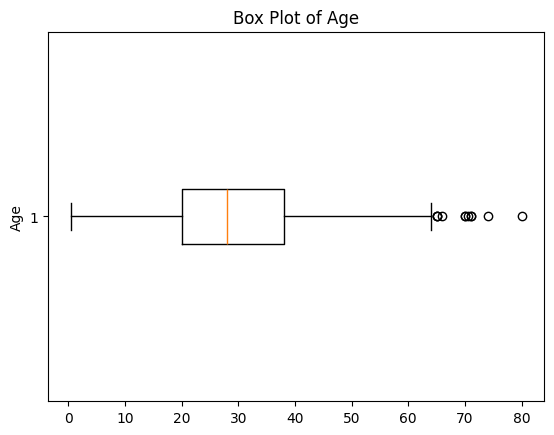

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(age_array, orientation= "horizontal")
plt.title("Box Plot of Age")
plt.ylabel("Age")
plt.show()